In [ ]:
!pip install geopandas

In [ ]:
pip install matplotlib-scalebar

In [ ]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import collections
import torch
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib_scalebar.scalebar import ScaleBar

from scipy.cluster.vq import kmeans2, whiten
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
####################################################################################
#################load CB files, you may change it to your own direction#############
####################################################################################
drivepath = "/content/drive/MyDrive/Colab/Dan/Capitalbike files/capitalbike2023_trajectory_hourly_count.geojson"
gdf = gpd.read_file(drivepath)

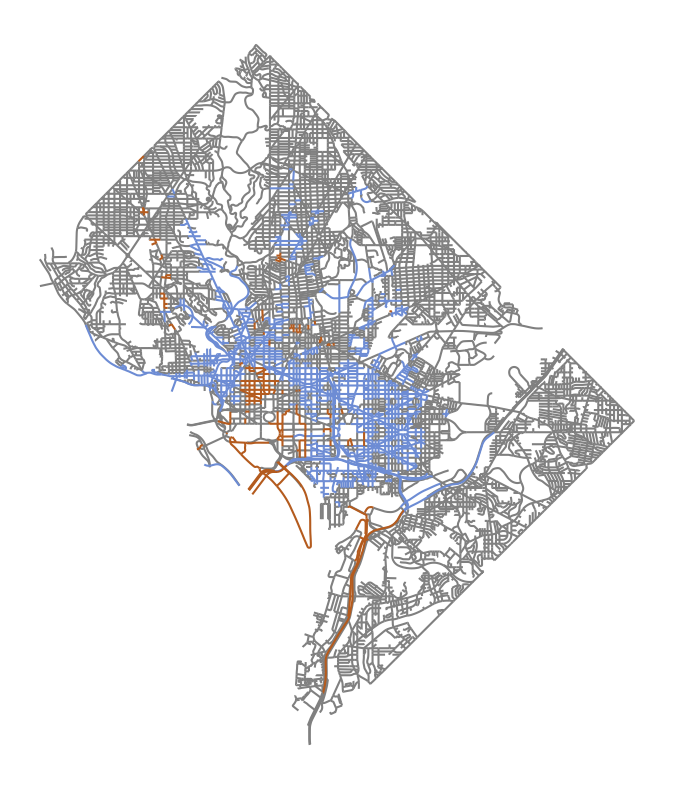

Number of geometries with sum_CB Top 30% & C_simi_CB Top 30% (blue): 1878
Number of geometries with sum_CB Top 30% & C_simi_CB Bottom 30% (red): 232


In [ ]:
####################################################################################
#################  this cell reproduce Figure4(c)  ################################
####################################################################################


#Calculate total trip volume of each time series
gdf['CB_D1'] = gdf[['All_D_6', 'All_D_7', 'All_D_8', 'All_D_9', 'All_D_10']].sum(axis=1)
gdf['CB_D2'] = gdf[['All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15']].sum(axis=1)
gdf['CB_D3'] = gdf[['All_D_16', 'All_D_17', 'All_D_18', 'All_D_19', 'All_D_20']].sum(axis=1)
gdf['CB_D4'] = gdf[['All_D_21', 'All_D_22', 'All_D_23', 'All_D_0', 'All_D_1']].sum(axis=1)
gdf['CB_Y1'] = gdf[['All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10']].sum(axis=1)
gdf['CB_Y2'] = gdf[['All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15']].sum(axis=1)
gdf['CB_Y3'] = gdf[['All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20']].sum(axis=1)
gdf['CB_Y4'] = gdf[['All_Y_21', 'All_Y_22', 'All_Y_23', 'All_Y_0', 'All_Y_1']].sum(axis=1)


#Calculate total CB trip volume
gdf['sum_CB'] = gdf[['CB_D1', 'CB_D2', 'CB_D3', 'CB_D4',
           'CB_Y1', 'CB_Y2', 'CB_Y3', 'CB_Y4']].sum(axis=1)

gdf = gdf.drop(index=5242)
gdf = gdf[gdf['sum_CB'] != 0].copy()


#Calculate cosine similarity
columns = ['CB_D1', 'CB_D2', 'CB_D3', 'CB_D4',
           'CB_Y1', 'CB_Y2', 'CB_Y3', 'CB_Y4']
data = gdf[columns]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
cosine_sim_matrix = cosine_similarity(normalized_data)
C_similarity = cosine_sim_matrix.sum(axis=1) - 1
gdf['C_simi_CB'] = C_similarity



#plot figure 4c
sum_CB_quantiles30 = gdf['sum_CB'].quantile([0.3]).values[0]
sum_CB_quantiles70 = gdf['sum_CB'].quantile([0.7]).values[0]
C_simi_CB_quantiles_30 = gdf['C_simi_CB'].quantile([0.3]).values[0]
C_simi_CB_quantiles_70 = gdf['C_simi_CB'].quantile([0.7]).values[0]

def assign_color(row):
    if row['sum_CB'] >= sum_CB_quantiles70 and row['C_simi_CB'] >= C_simi_CB_quantiles_70:
        return '#6d8cd4'
    elif row['sum_CB'] >= sum_CB_quantiles70 and row['C_simi_CB'] <= C_simi_CB_quantiles_30:
        return '#b45b1e'
    else:
        return 'gray'

gdf['color'] = gdf.apply(assign_color, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for color in gdf['color'].unique():
    gdf[gdf['color'] == color].plot(ax=ax, color=color, label=color)

legend_elements = [Line2D([0], [0], color='#6d8cd4', lw=4, label='CB volume and similarity both high'),
                   Line2D([0], [0], color='#b45b1e', lw=4, label='CB high volume but low similarity'),
                   Line2D([0], [0], color='gray', lw=4, label='Other')]
ax.axis('off')
plt.show()

count_blue = gdf[gdf['color'] == '#6d8cd4'].shape[0]
count_red = gdf[gdf['color'] == '#b45b1e'].shape[0]

print(f"Number of geometries with sum_CB Top 30% & C_simi_CB Top 30% (blue): {count_blue}")
print(f"Number of geometries with sum_CB Top 30% & C_simi_CB Bottom 30% (red): {count_red}")

In [ ]:
####################################################################################
#################load LS files, you may change it to your own direction#############
####################################################################################
drivepath = "/content/drive/MyDrive/Colab/Dan/Chapter1/2023LIME_escooter/escooter2023_trajectory_hourly_count.shp"
gdf = gpd.read_file(drivepath)

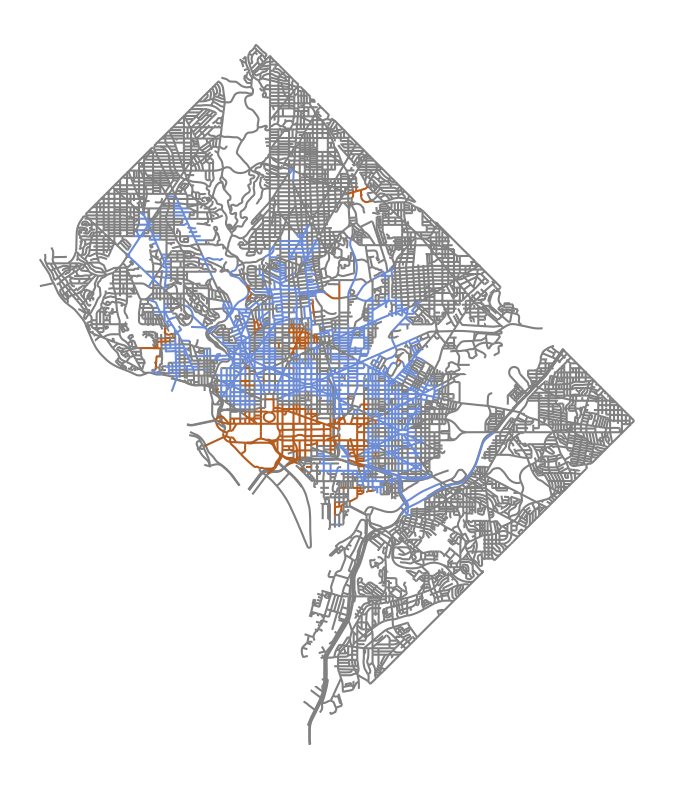

Number of geometries with sum_LS Top 30% & C_simi_LS Top 30% (blue): 2100
Number of geometries with sum_LS Top 30% & C_simi_LS Bottom 30% (red): 469


In [ ]:
####################################################################################
#################  this cell reproduce Figure4(a)  ################################
####################################################################################


#Calculate total trip volume of each time series
gdf['LS_D1'] = gdf[['All_D_6', 'All_D_7', 'All_D_8', 'All_D_9', 'All_D_10']].sum(axis=1)
gdf['LS_D2'] = gdf[['All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15']].sum(axis=1)
gdf['LS_D3'] = gdf[['All_D_16', 'All_D_17', 'All_D_18', 'All_D_19', 'All_D_20']].sum(axis=1)
gdf['LS_D4'] = gdf[['All_D_21', 'All_D_22', 'All_D_23', 'All_D_0', 'All_D_1']].sum(axis=1)
gdf['LS_Y1'] = gdf[['All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10']].sum(axis=1)
gdf['LS_Y2'] = gdf[['All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15']].sum(axis=1)
gdf['LS_Y3'] = gdf[['All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20']].sum(axis=1)
gdf['LS_Y4'] = gdf[['All_Y_21', 'All_Y_22', 'All_Y_23', 'All_Y_0', 'All_Y_1']].sum(axis=1)


#Calculate total LS trip volume
gdf['sum_LS'] = gdf[['LS_D1', 'LS_D2', 'LS_D3', 'LS_D4',
           'LS_Y1', 'LS_Y2', 'LS_Y3', 'LS_Y4']].sum(axis=1)

gdf = gdf.drop(index=5242)
gdf = gdf[gdf['sum_LS'] != 0].copy()


#Calculate cosine similarity
columns = ['LS_D1', 'LS_D2', 'LS_D3', 'LS_D4',
           'LS_Y1', 'LS_Y2', 'LS_Y3', 'LS_Y4']
data = gdf[columns]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
cosine_sim_matrix = cosine_similarity(normalized_data)
C_similarity = cosine_sim_matrix.sum(axis=1) - 1
gdf['C_simi_LS'] = C_similarity



#plot figure 4a
sum_LS_quantiles30 = gdf['sum_LS'].quantile([0.3]).values[0]
sum_LS_quantiles70 = gdf['sum_LS'].quantile([0.7]).values[0]
C_simi_LS_quantiles_30 = gdf['C_simi_LS'].quantile([0.3]).values[0]
C_simi_LS_quantiles_70 = gdf['C_simi_LS'].quantile([0.7]).values[0]

def assign_color(row):
    if row['sum_LS'] >= sum_LS_quantiles70 and row['C_simi_LS'] >= C_simi_LS_quantiles_70:
        return '#6d8cd4'
    elif row['sum_LS'] >= sum_LS_quantiles70 and row['C_simi_LS'] <= C_simi_LS_quantiles_30:
        return '#b45b1e'
    else:
        return 'gray'

gdf['color'] = gdf.apply(assign_color, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for color in gdf['color'].unique():
    gdf[gdf['color'] == color].plot(ax=ax, color=color, label=color)

legend_elements = [Line2D([0], [0], color='#6d8cd4', lw=4, label='LS volume and similarity both high'),
                   Line2D([0], [0], color='#b45b1e', lw=4, label='LS high volume but low similarity'),
                   Line2D([0], [0], color='gray', lw=4, label='Other')]
# Remove coordinate borders
ax.axis('off')
plt.show()

count_blue = gdf[gdf['color'] == '#6d8cd4'].shape[0]
count_red = gdf[gdf['color'] == '#b45b1e'].shape[0]

print(f"Number of geometries with sum_LS Top 30% & C_simi_LS Top 30% (blue): {count_blue}")
print(f"Number of geometries with sum_LS Top 30% & C_simi_LS Bottom 30% (red): {count_red}")

In [ ]:
####################################################################################
#################load LB files, you may change it to your own direction#############
####################################################################################
drivepath = "/content/drive/MyDrive/Colab/Dan/Chapter1/2023LIME_bike/limebike2023_trajectory_hourly_count.shp"
gdf = gpd.read_file(drivepath)

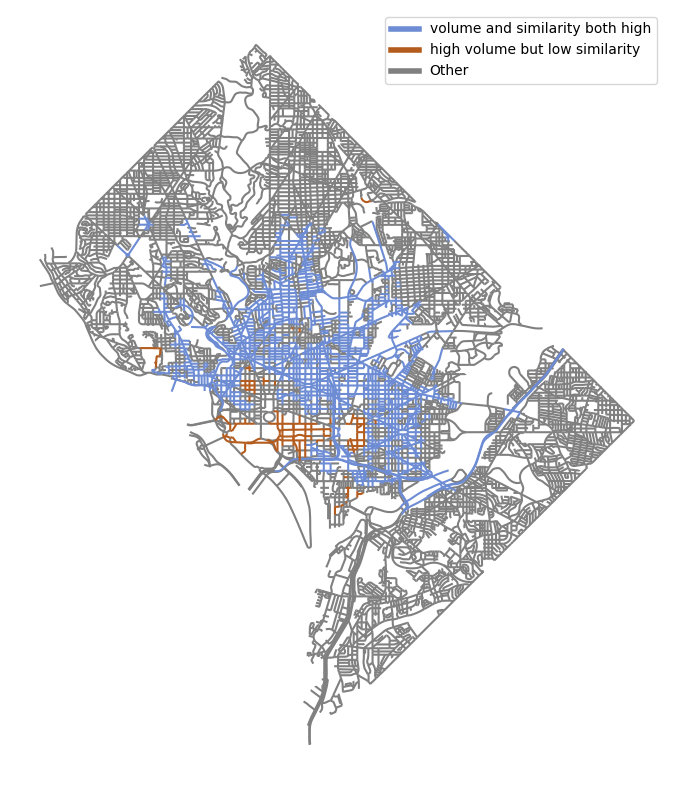

Number of geometries with sum_LB Top 30% & C_simi_LB Top 30% (blue): 2554
Number of geometries with sum_LB Top 30% & C_simi_LB Bottom 30% (red): 164


In [ ]:
####################################################################################
#################  this cell reproduce Figure4(b)  ################################
####################################################################################


#Calculate total trip volume of each time series
gdf['LB_D1'] = gdf[['All_D_6', 'All_D_7', 'All_D_8', 'All_D_9', 'All_D_10']].sum(axis=1)
gdf['LB_D2'] = gdf[['All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15']].sum(axis=1)
gdf['LB_D3'] = gdf[['All_D_16', 'All_D_17', 'All_D_18', 'All_D_19', 'All_D_20']].sum(axis=1)
gdf['LB_D4'] = gdf[['All_D_21', 'All_D_22', 'All_D_23', 'All_D_0', 'All_D_1']].sum(axis=1)
gdf['LB_Y1'] = gdf[['All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10']].sum(axis=1)
gdf['LB_Y2'] = gdf[['All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15']].sum(axis=1)
gdf['LB_Y3'] = gdf[['All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20']].sum(axis=1)
gdf['LB_Y4'] = gdf[['All_Y_21', 'All_Y_22', 'All_Y_23', 'All_Y_0', 'All_Y_1']].sum(axis=1)


#Calculate total LS trip volume
gdf['sum_LB'] = gdf[['LB_D1', 'LB_D2', 'LB_D3', 'LB_D4',
           'LB_Y1', 'LB_Y2', 'LB_Y3', 'LB_Y4']].sum(axis=1)

gdf = gdf.drop(index=5242)
gdf = gdf[gdf['sum_LB'] != 0].copy()


#Calculate cosine similarity
columns = ['LB_D1', 'LB_D2', 'LB_D3', 'LB_D4',
           'LB_Y1', 'LB_Y2', 'LB_Y3', 'LB_Y4']
data = gdf[columns]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
cosine_sim_matrix = cosine_similarity(normalized_data)
C_similarity = cosine_sim_matrix.sum(axis=1) - 1
gdf['C_simi_LB'] = C_similarity



#plot figure 4a
sum_LB_quantiles30 = gdf['sum_LB'].quantile([0.3]).values[0]
sum_LB_quantiles70 = gdf['sum_LB'].quantile([0.7]).values[0]
C_simi_LB_quantiles_30 = gdf['C_simi_LB'].quantile([0.3]).values[0]
C_simi_LB_quantiles_70 = gdf['C_simi_LB'].quantile([0.7]).values[0]

def assign_color(row):
    if row['sum_LB'] >= sum_LB_quantiles70 and row['C_simi_LB'] >= C_simi_LB_quantiles_70:
        return '#6d8cd4'
    elif row['sum_LB'] >= sum_LB_quantiles70 and row['C_simi_LB'] <= C_simi_LB_quantiles_30:
        return '#b45b1e'
    else:
        return 'gray'

gdf['color'] = gdf.apply(assign_color, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for color in gdf['color'].unique():
    gdf[gdf['color'] == color].plot(ax=ax, color=color, label=color)

legend_elements = [Line2D([0], [0], color='#6d8cd4', lw=4, label='volume and similarity both high'),
                   Line2D([0], [0], color='#b45b1e', lw=4, label='high volume but low similarity'),
                   Line2D([0], [0], color='gray', lw=4, label='Other')]
# Remove coordinate borders
ax.axis('off')
ax.legend(handles=legend_elements)
plt.show()

count_blue = gdf[gdf['color'] == '#6d8cd4'].shape[0]
count_red = gdf[gdf['color'] == '#b45b1e'].shape[0]

print(f"Number of geometries with sum_LB Top 30% & C_simi_LB Top 30% (blue): {count_blue}")
print(f"Number of geometries with sum_LB Top 30% & C_simi_LB Bottom 30% (red): {count_red}")

In [ ]:
####################################################################################
#################load ST files, you may change it to your own direction#############
####################################################################################
drivepath = "/content/drive/MyDrive/Colab/Dan/Chapter1/2023Allyear_strava/strava2023_trajectory_hourly_count.shp"
gdf = gpd.read_file(drivepath)

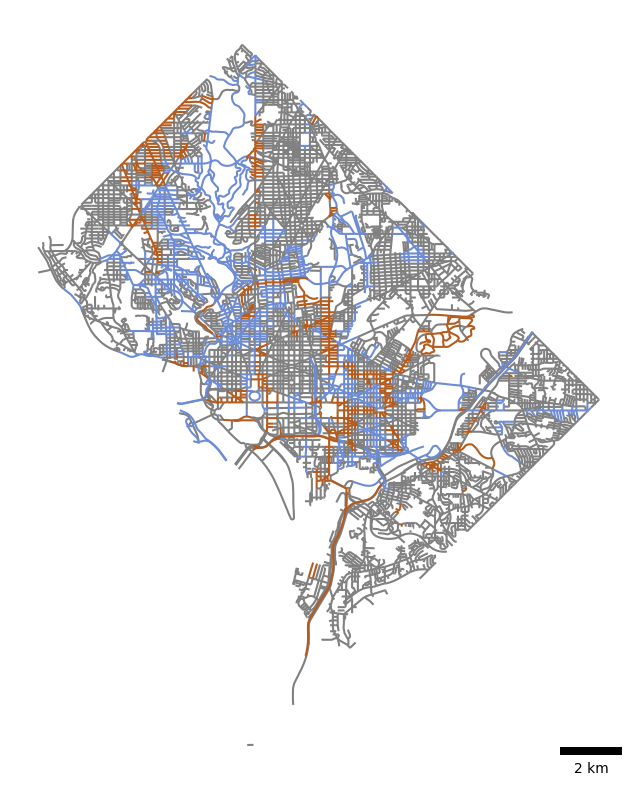

Number of geometries with sum_ST Top 30% & C_simi_ST Top 30% (blue): 1896
Number of geometries with sum_ST Top 30% & C_simi_ST Bottom 30% (red): 1047


In [ ]:
####################################################################################
#################  this cell reproduce Figure4(d)  ################################
####################################################################################


#Calculate total trip volume of each time series
gdf['ST_D1'] = gdf[['All_D_6', 'All_D_7', 'All_D_8', 'All_D_9', 'All_D_10']].sum(axis=1)
gdf['ST_D2'] = gdf[['All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15']].sum(axis=1)
gdf['ST_D3'] = gdf[['All_D_16', 'All_D_17', 'All_D_18', 'All_D_19', 'All_D_20']].sum(axis=1)
gdf['ST_D4'] = gdf[['All_D_21', 'All_D_22', 'All_D_23', 'All_D_0', 'All_D_1']].sum(axis=1)
gdf['ST_Y1'] = gdf[['All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10']].sum(axis=1)
gdf['ST_Y2'] = gdf[['All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15']].sum(axis=1)
gdf['ST_Y3'] = gdf[['All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20']].sum(axis=1)
gdf['ST_Y4'] = gdf[['All_Y_21', 'All_Y_22', 'All_Y_23', 'All_Y_0', 'All_Y_1']].sum(axis=1)


#Calculate total LS trip volume
gdf['sum_ST'] = gdf[['ST_D1', 'ST_D2', 'ST_D3', 'ST_D4',
           'ST_Y1', 'ST_Y2', 'ST_Y3', 'ST_Y4']].sum(axis=1)

gdf = gdf.drop(index=5242)
gdf = gdf[gdf['sum_ST'] != 0].copy()


#Calculate cosine similarity
columns = ['ST_D1', 'ST_D2', 'ST_D3', 'ST_D4',
           'ST_Y1', 'ST_Y2', 'ST_Y3', 'ST_Y4']
data = gdf[columns]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
cosine_sim_matrix = cosine_similarity(normalized_data)
C_similarity = cosine_sim_matrix.sum(axis=1) - 1
gdf['C_simi_ST'] = C_similarity



#plot figure 4a
sum_ST_quantiles30 = gdf['sum_ST'].quantile([0.3]).values[0]
sum_ST_quantiles70 = gdf['sum_ST'].quantile([0.7]).values[0]
C_simi_ST_quantiles_30 = gdf['C_simi_ST'].quantile([0.3]).values[0]
C_simi_ST_quantiles_70 = gdf['C_simi_ST'].quantile([0.7]).values[0]

def assign_color(row):
    if row['sum_ST'] >= sum_ST_quantiles70 and row['C_simi_ST'] >= C_simi_ST_quantiles_70:
        return '#6d8cd4'
    elif row['sum_ST'] >= sum_ST_quantiles70 and row['C_simi_ST'] <= C_simi_ST_quantiles_30:
        return '#b45b1e'
    else:
        return 'gray'

gdf['color'] = gdf.apply(assign_color, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for color in gdf['color'].unique():
    gdf[gdf['color'] == color].plot(ax=ax, color=color, label=color)

legend_elements = [Line2D([0], [0], color='#6d8cd4', lw=4, label='ST volume and similarity both high'),
                   Line2D([0], [0], color='#b45b1e', lw=4, label='ST high volume but low similarity'),
                   Line2D([0], [0], color='gray', lw=4, label='Other')]
ax.axis('off')

# # Add scale bar
scalebar = ScaleBar(1, location='lower right')  # 1 unit in your CRS corresponds to 1 meter
ax.add_artist(scalebar)

plt.show()

count_blue = gdf[gdf['color'] == '#6d8cd4'].shape[0]
count_red = gdf[gdf['color'] == '#b45b1e'].shape[0]

print(f"Number of geometries with sum_ST Top 30% & C_simi_ST Top 30% (blue): {count_blue}")
print(f"Number of geometries with sum_ST Top 30% & C_simi_ST Bottom 30% (red): {count_red}")